<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D7_LC1_Training_and_Evaluating_Clustering_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Unsupervised Learning: Training and Evaluating Clustering Models (Live Coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>





# Clustering (Live Coding)
__Topic covered__

- Clustering Methods
- K-Means
- Hierarchical
- Elbow Method
- Silhouette Method

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

## Data Generation

<span style="color:orange">**We will use the ```sklearn.datasets.samples_generator``` to generate some data for us. Imagine this is data for five different sensors and we need to find out if the sensor data can be grouped into clusters to find out the number of IoT devices generating this data**</span>

In [ ]:
X, y_true = make_blobs(n_samples=1000, centers=3 , n_features=5,
                       cluster_std=1.5, random_state=42)

In [ ]:
df = pd.DataFrame(X, columns= ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5'])
print(df.shape)
df.head()

(1000, 5)


,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5
0,-1.423777,12.464901,6.253028,-0.875595,-6.761983
1,-6.948660,-9.985816,10.366466,3.460015,2.516848
2,-4.150186,-7.409430,8.034063,2.806919,6.157752
3,-0.032171,7.024038,7.405453,0.877058,-8.799507
4,-0.909900,7.575774,6.712886,3.330853,-7.785484


Looking at just two features and plotting the data looks like there are possibly three clusters though two might be overlapping

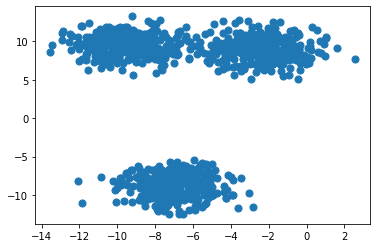

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50);

<AxesSubplot:>

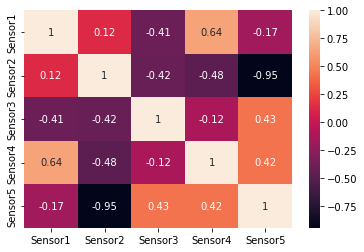

In [ ]:
sns.heatmap(df.corr(),annot=True,)

## Selecting number of clusters

### The Elbow Method

<span style="color:orange">**But what is the Elbow Method!?**</span>

It is the most common approach for selecting the optimal **number of clusters**. Being a simple but not very robust method, it calculates the clustering score (**SSE - sum of squared errors**) by running clustering algorithms on the dataset for a range of values of **k** (see, k from 2 to 10 in the examples below).

<span style="color:orange">**We will use ```.inertia_```, a kmeans build in function to calculate the sum squared distances of samples to their closest cluster centers**</span>

In [ ]:
cluster_errors = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))])
    kmeans_pipeline.fit(df)
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

K =  2 	WCSS Err. =  2671.878852086422
K =  3 	WCSS Err. =  1093.7597831188464
K =  4 	WCSS Err. =  941.2303803629746
K =  5 	WCSS Err. =  801.4594821113413
K =  6 	WCSS Err. =  679.1640431153468
K =  7 	WCSS Err. =  638.743159224638
K =  8 	WCSS Err. =  603.0434451301853
K =  9 	WCSS Err. =  568.7301074013047
K =  10 	WCSS Err. =  541.8552213567101


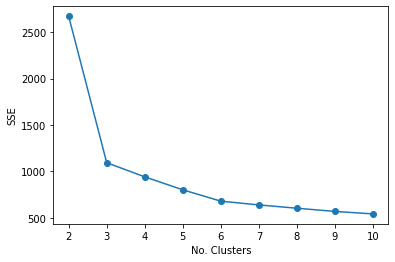

In [ ]:
plt.plot(range(2, 11), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

### Silhouette

Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance.

There are majorly two types of measures to assess the clustering performance.

1. **Extrinsic Measures which require ground truth labels.** Examples are Adjusted Rand index, Fowlkes-Mallows scores, Mutual information based scores, Homogeneity, Completeness and V-measure.

2. **Intrinsic Measures that does not require ground truth labels.** Some of the clustering performance measures are Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index etc.

There are main points that we should remember during calculating silhouette coefficient .The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point o is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

<span style="color:orange">**In this example, we will look at the Silhouette Coefficient for data with no labels.(although technically we do have labels when we generate the data. But lets ignore that for now.)**</span>


For n_clusters = 2 The average silhouette_score is : 0.6972
For n_clusters = 3 The average silhouette_score is : 0.669
For n_clusters = 4 The average silhouette_score is : 0.4515
For n_clusters = 5 The average silhouette_score is : 0.2904
For n_clusters = 6 The average silhouette_score is : 0.1316
For n_clusters = 7 The average silhouette_score is : 0.1174
For n_clusters = 8 The average silhouette_score is : 0.098
For n_clusters = 9 The average silhouette_score is : 0.0767
For n_clusters = 10 The average silhouette_score is : 0.084


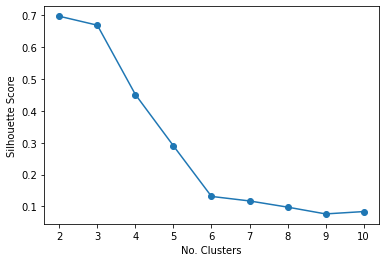

In [ ]:
silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])

    cluster_labels = kmeans_pipeline.fit_predict(df)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df, cluster_labels))

plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

<span style="color:orange">**What does Agglomerative Clustering score looks like with 2-11 clusters?**</span>

For n_clusters = 2 The average silhouette_score is : 0.6972
For n_clusters = 3 The average silhouette_score is : 0.669
For n_clusters = 4 The average silhouette_score is : 0.4497
For n_clusters = 5 The average silhouette_score is : 0.2841
For n_clusters = 6 The average silhouette_score is : 0.1357
For n_clusters = 7 The average silhouette_score is : 0.1168
For n_clusters = 8 The average silhouette_score is : 0.0965
For n_clusters = 9 The average silhouette_score is : 0.0804
For n_clusters = 10 The average silhouette_score is : 0.0791


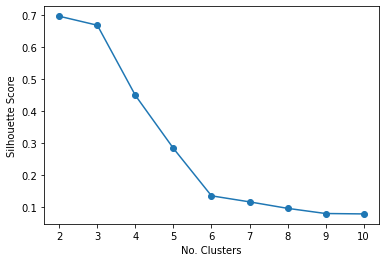

In [ ]:
from sklearn.cluster import AgglomerativeClustering

silhouette_s = []

for n_clusters in range(2, 11):
    agglo_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("cluster", AgglomerativeClustering(n_clusters=n_clusters))])

    cluster_labels = agglo_pipeline.fit_predict(df)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df, cluster_labels))

plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

<span style="color:orange">**What Looks like KMeans and Agglomerative Clustering outputs the same score. Now lets make some fancy graphs!**</span>

This code was adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.6972
For n_clusters = 3 The average silhouette_score is : 0.669
For n_clusters = 4 The average silhouette_score is : 0.4515
For n_clusters = 5 The average silhouette_score is : 0.2904
For n_clusters = 6 The average silhouette_score is : 0.13
For n_clusters = 7 The average silhouette_score is : 0.1158
For n_clusters = 8 The average silhouette_score is : 0.0972
For n_clusters = 9 The average silhouette_score is : 0.08




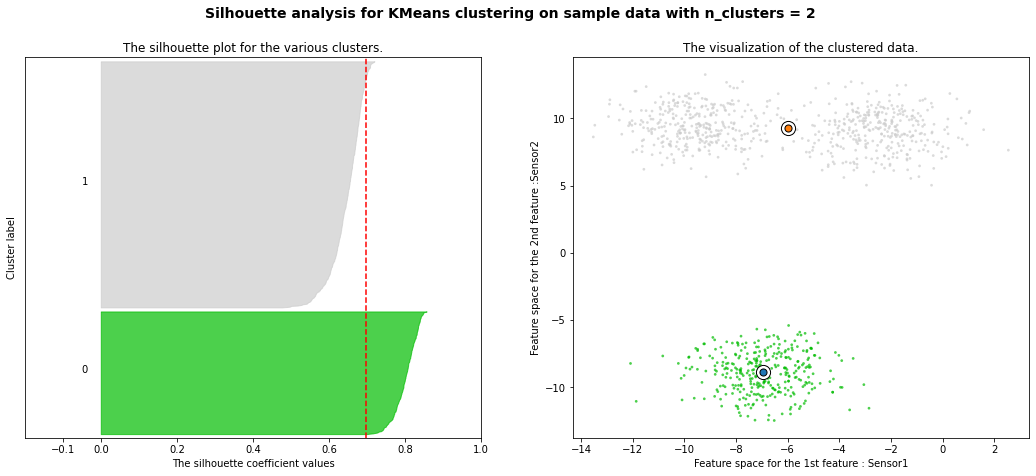

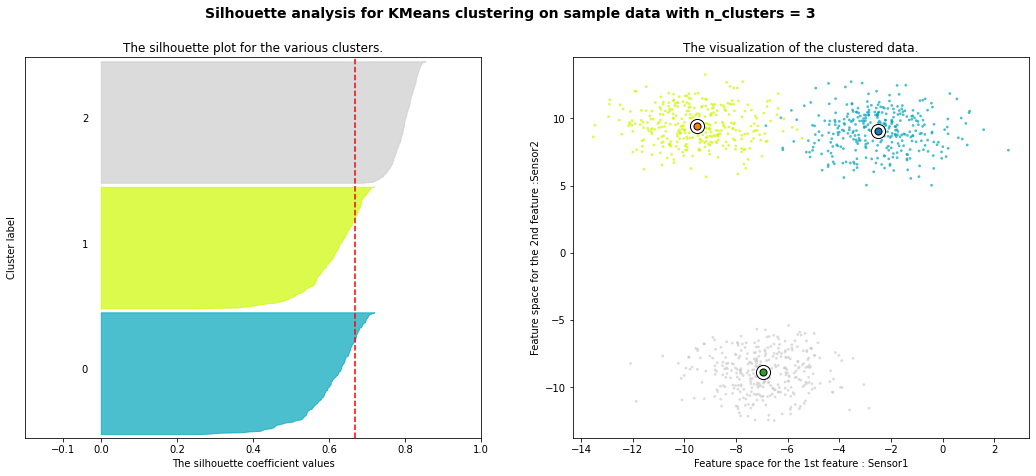

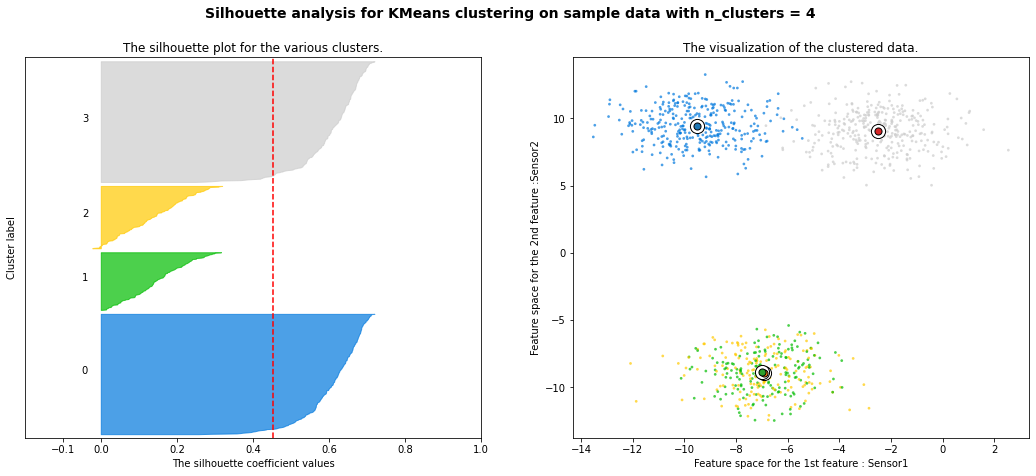

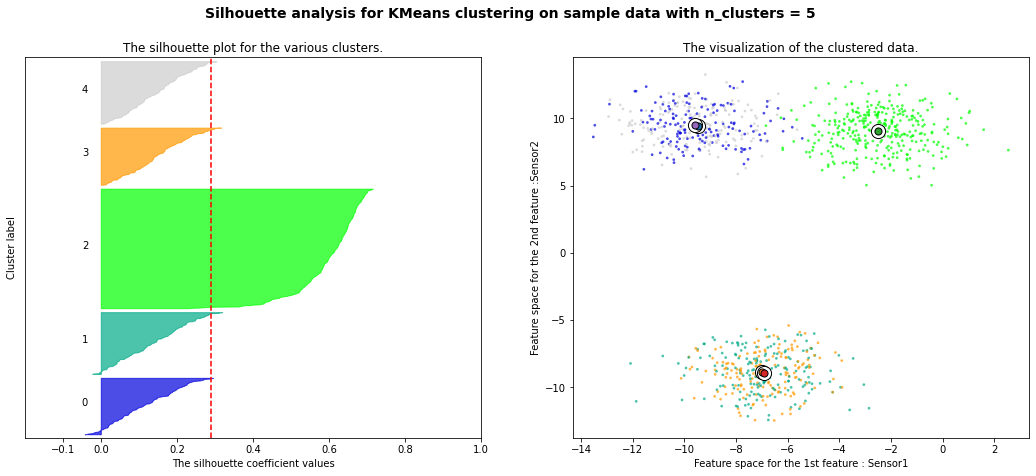

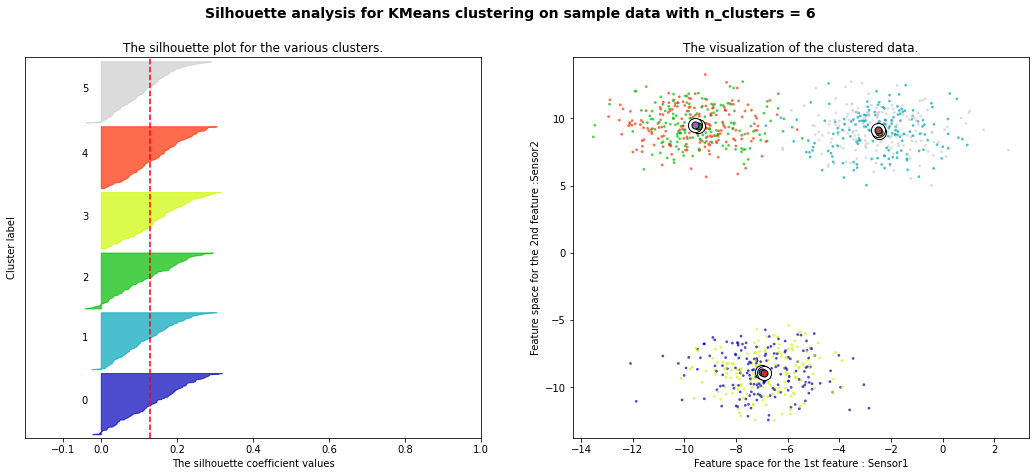

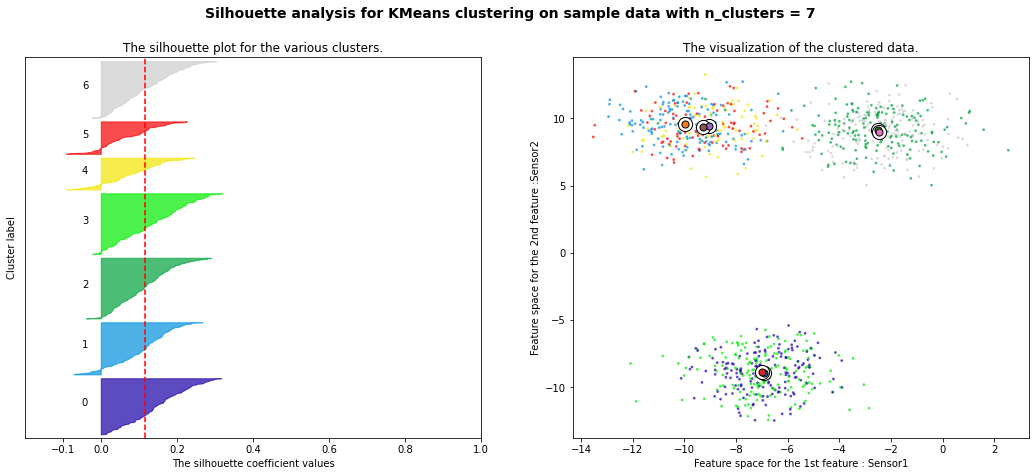

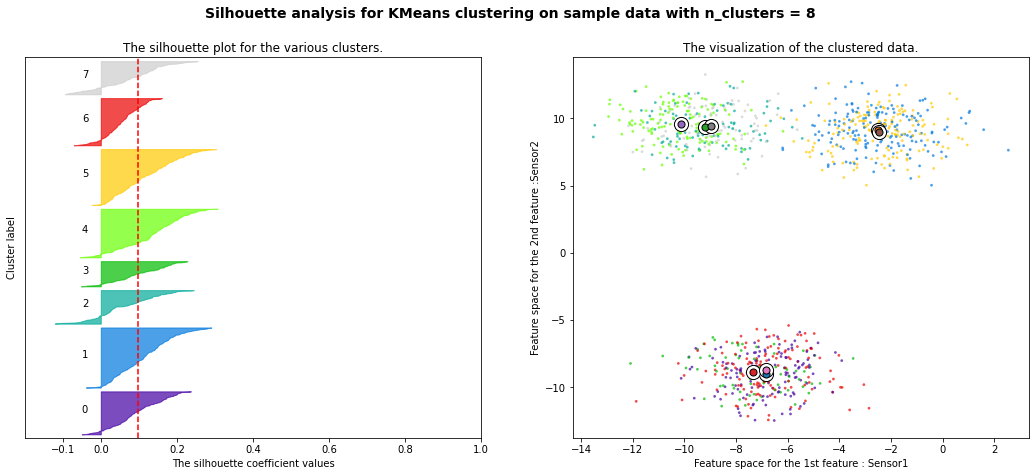

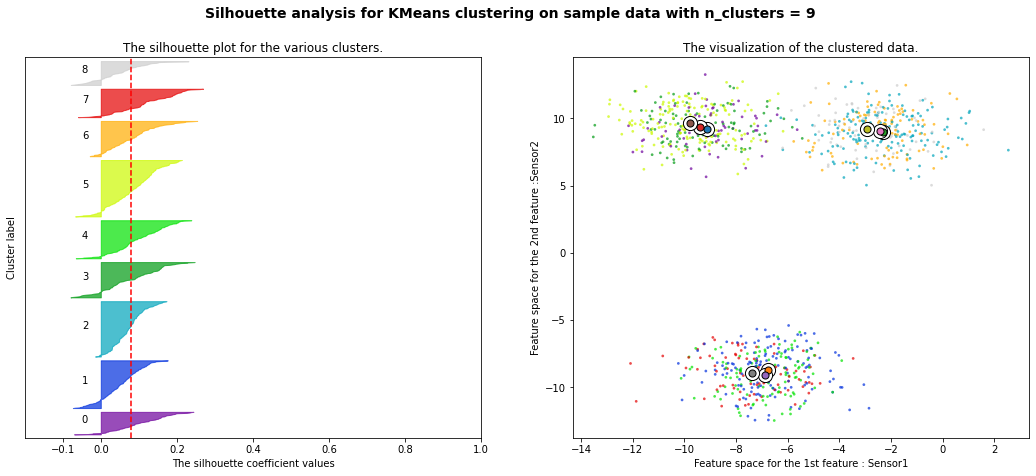

In [ ]:
''' Note: The code below is directly took from sklearn documentation of silhoutte analysis.
          And so you do not have to spend time trying to understand the code'''

range_n_clusters = range(2, 10)

r_seed = 17

cols = df.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])

    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(X[:, 0],
                X[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor="k")

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

For k=3 we notice even-shaped silhouettes which don't have too many negative values

## Clustering with the best model

In [ ]:
kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=3, random_state=17, verbose=0))])

# kmeans_pipeline.fit(df)
clusters = kmeans_pipeline.fit_predict(df)
df['IoTDevice'] = clusters
df.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,IoTDevice
0,-1.423777,12.464901,6.253028,-0.875595,-6.761983,0
1,-6.948660,-9.985816,10.366466,3.460015,2.516848,2
2,-4.150186,-7.409430,8.034063,2.806919,6.157752,2
3,-0.032171,7.024038,7.405453,0.877058,-8.799507,0
4,-0.909900,7.575774,6.712886,3.330853,-7.785484,0


In [ ]:
df['IoTDevice'].value_counts()

0    334
2    333
1    333
Name: IoTDevice, dtype: int64

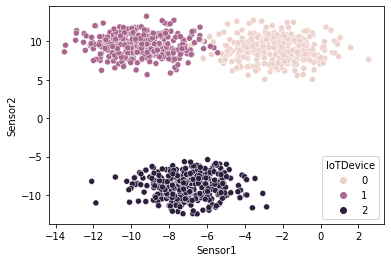

In [ ]:
sns.scatterplot(x=df['Sensor1'], y=df['Sensor2'], hue=df['IoTDevice']);

### End of this Notebook